In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm

## Business Questions:


Descriptive Analytics

    Sales Analysis: What are the total sales for each product category across different channels and regions? This involves summarizing current sales data to understand what products are performing well.
    Customer Segmentation: How do customers differ in their spending across different product categories? This can involve cluster analysis to identify different types of customers based on their purchasing patterns.
    Market Analysis: What are the differences in purchasing patterns across regions? Are there specific product categories that are more popular in certain regions?

Inferential Analytics

    Comparative Analysis: Is there a significant difference in the average spending on different product categories between the two channels? This could involve hypothesis testing to compare means across groups.
    Association Rules: Are there certain products that are frequently bought together? This could involve using market basket analysis to find associations between different products.
    Regional Preferences: Are there significant differences in purchasing habits across different regions? This could involve statistical tests to compare regional data.

Predictive Analytics

    Sales Forecasting: Can we predict future sales for each product category based on historical data? This would involve using time series analysis or machine learning models for sales forecasting.
    Customer Spending Prediction: Can we predict how much a new customer will spend in each category based on their demographics or initial purchases? This involves building a predictive model.
    Churn Prediction: Can we predict which customers are likely to stop buying (churn) based on their purchasing patterns? This involves identifying patterns that precede churn and building a predictive model.

Looks like the top selling products are Fresh, Milk and Groceries. Numbers are expenditure of clients in monetary units

## Descriptive Statistics

In [80]:
df = pd.read_csv('wholesale.csv')
print (df.head(5) , "\n")
print ((df.sum() / df.sum().sum()) * 100)

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185 

Channel              0.003981
Region               0.007653
Fresh               36.112841
Milk                17.442869
Grocery             23.928007
Frozen               9.244453
Detergents_Paper     8.671360
Delicassen           4.588836
dtype: float64


<Figure size 432x504 with 0 Axes>

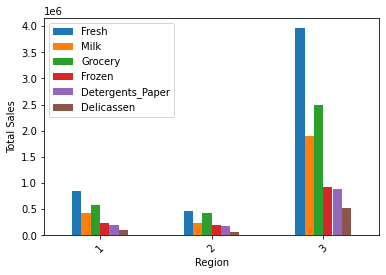

In [81]:
plt.figure(figsize=(6,7))
df.groupby('Region')[['Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen']].sum().plot(kind='bar')
plt.xticks(rotation = 45)
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.show();

          Channel      Region          Fresh          Milk       Grocery  \
count  440.000000  440.000000     440.000000    440.000000    440.000000   
mean     1.322727    2.543182   12000.297727   5796.265909   7951.277273   
std      0.468052    0.774272   12647.328865   7380.377175   9503.162829   
min      1.000000    1.000000       3.000000     55.000000      3.000000   
25%      1.000000    2.000000    3127.750000   1533.000000   2153.000000   
50%      1.000000    3.000000    8504.000000   3627.000000   4755.500000   
75%      2.000000    3.000000   16933.750000   7190.250000  10655.750000   
max      2.000000    3.000000  112151.000000  73498.000000  92780.000000   

             Frozen  Detergents_Paper    Delicassen  
count    440.000000        440.000000    440.000000  
mean    3071.931818       2881.493182   1524.870455  
std     4854.673333       4767.854448   2820.105937  
min       25.000000          3.000000      3.000000  
25%      742.250000        256.750000    408.

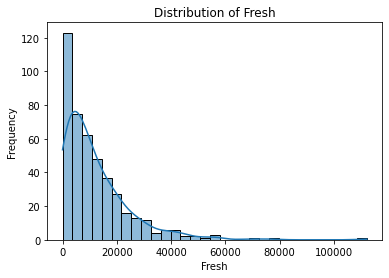

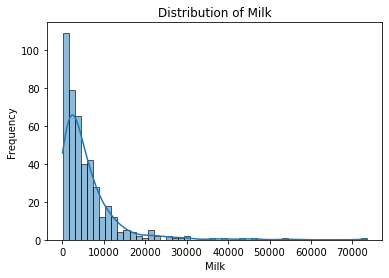

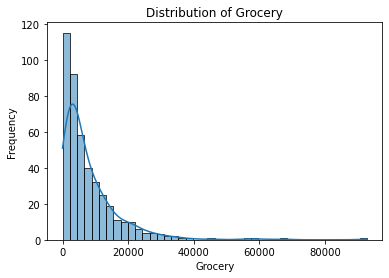

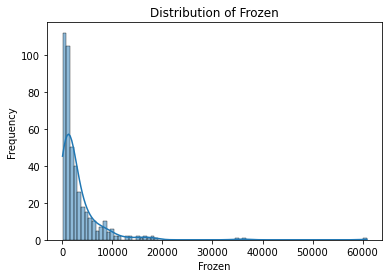

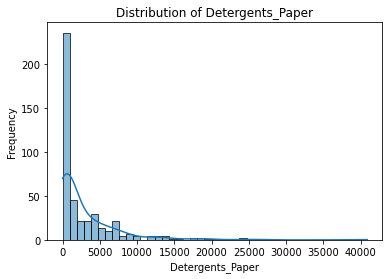

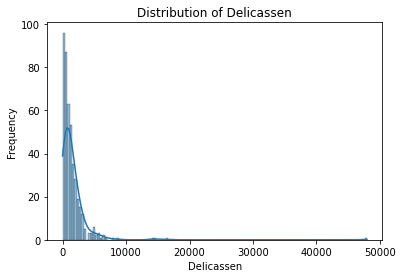

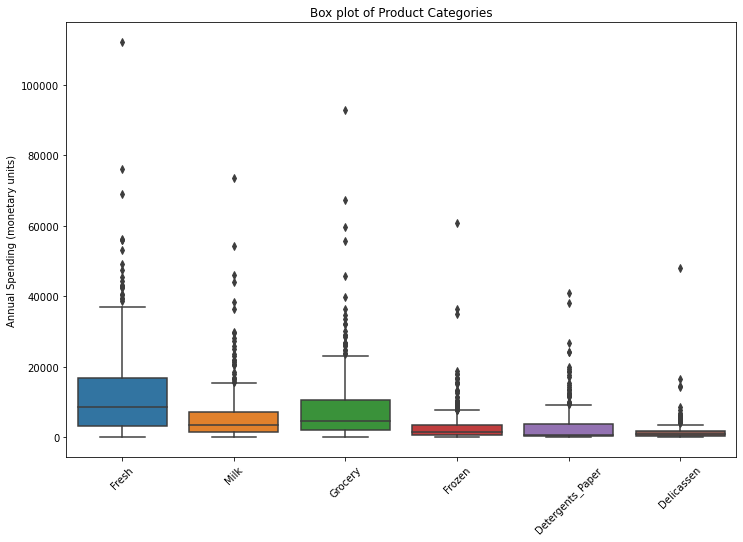

In [82]:
# Basic descriptive statistics for each category
print(df.describe())

# Visualize the distribution of each category with histograms
for column in df.columns[2:]:
    plt.figure()
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

# Box plots for each category to identify outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=df.iloc[:, 2:])
plt.title('Box plot of Product Categories')
plt.ylabel('Annual Spending (monetary units)')
plt.xticks(rotation=45)
plt.show()

## Probability

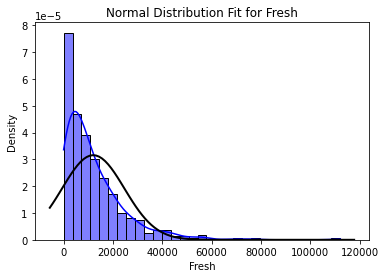

Normal Fit for Fresh: Mean = 12000.3, Std = 12632.95


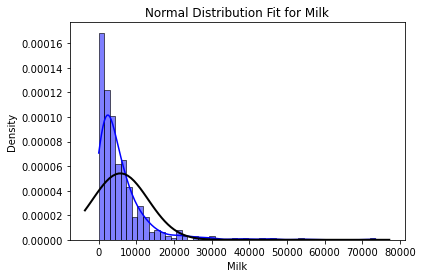

Normal Fit for Milk: Mean = 5796.27, Std = 7371.99


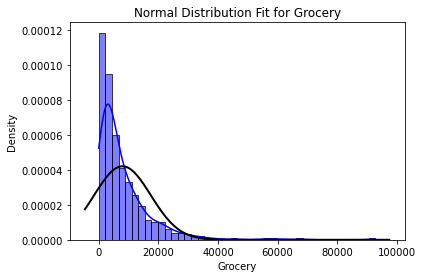

Normal Fit for Grocery: Mean = 7951.28, Std = 9492.36


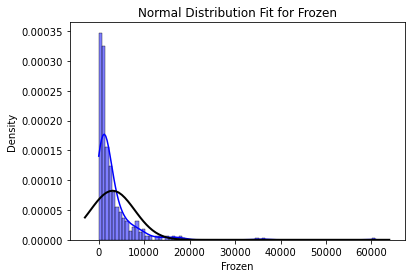

Normal Fit for Frozen: Mean = 3071.93, Std = 4849.15


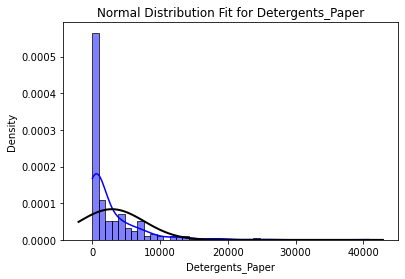

Normal Fit for Detergents_Paper: Mean = 2881.49, Std = 4762.43


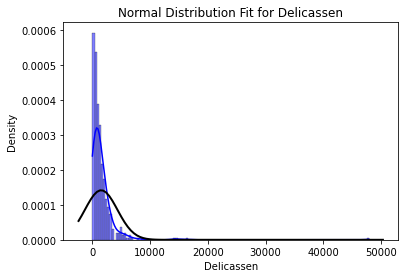

Normal Fit for Delicassen: Mean = 1524.87, Std = 2816.9
Expected number of purchases (lambda) for 'Frozen': 3071.93


In [83]:
# Normal Distribution Fit
for column in df.columns[2:]:
    mu, std = stats.norm.fit(df[column])
    plt.figure()
    sns.histplot(df[column], kde=True, stat='density', color='blue')
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = stats.norm.pdf(x, mu, std)
    plt.plot(x, p, 'k', linewidth=2)
    plt.title(f'Normal Distribution Fit for {column}')
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.show()
    print(f"Normal Fit for {column}: Mean = {round(mu, 2)}, Std = {round(std, 2)}")

## Poisson Distribution for 'Frozen'
lambda_frozen = df['Frozen'].mean()
print(f"Expected number of purchases (lambda) for 'Frozen': {round(lambda_frozen, 2)}")

T-test for 'Fresh' between Channels 1 and 2: T-stat=3.59, P-value=0.0


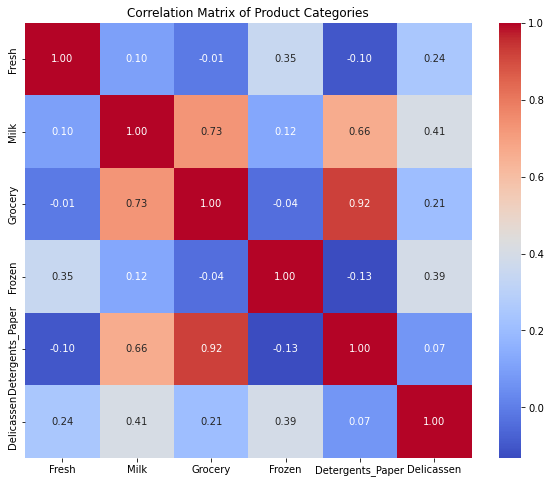

In [84]:

# Comparing the mean spending on 'Fresh' between two channels
t_stat, p_val = stats.ttest_ind(df[df['Channel'] == 1]['Fresh'], df[df['Channel'] == 2]['Fresh'])
print(f"T-test for 'Fresh' between Channels 1 and 2: T-stat={round(t_stat, 2)}, P-value={round(p_val, 2)}")

## Correlations Between Categories
# Heatmap of Pearson correlation coefficients between product categories
plt.figure(figsize=(10, 8))
sns.heatmap(df.iloc[:, 2:].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Product Categories')
plt.show()



## Sampling Distributions

### Studying the confidence interval of the major products consumed

#### Starting with Fresh

I want to start by finding out what is the  current mean and standard deviation of the fresh column

In [85]:
fresh_mean = df['Fresh'].mean()
fresh_sd = df['Fresh'].std()
fresh_mean, fresh_sd

(12000.297727272728, 12647.328865076894)

We can see that our intial representation of the fresh column resembles more of the gamma function. We need to include high values becasue these are totals of product consumers purchased. So it looks like the data is representing the aggregation of product bought

In [86]:
#Calculating shape and scale parameter
k_shape = fresh_mean**2 / fresh_sd**2
lambda_scale = fresh_sd / k_shape
k_shape,lambda_scale
# Recalculating with the correct understanding
variance_gamma = fresh_sd**2  # Variance is the square of the standard deviation

# Shape parameter (k)
k_gamma = fresh_mean**2 / variance_gamma

# Scale parameter (theta)
theta_gamma = variance_gamma / fresh_mean

(k_gamma, theta_gamma)



(0.9002982769251917, 13329.246578431324)

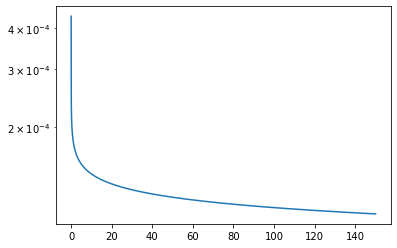

In [87]:
x = np.linspace (0, 150, 1000000) # This is creating the x-scale starting from 0 to 150 and simulating 10,000 samples
y = stats.gamma.pdf(x, a= k_gamma, scale=theta_gamma)#
plt.yscale('log')
plt.plot(x,y)


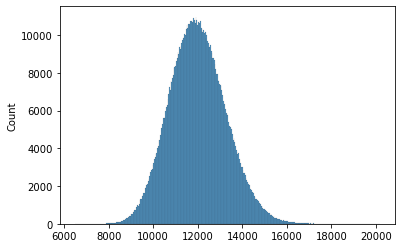

In [88]:
# Number of samples per mean calculation and number of means to generate
num_samples_per_mean = 100
num_means = 1000000
# Generate random samples and calculate means
means = [np.random.gamma(k_gamma, theta_gamma, num_samples_per_mean).mean() for _ in range(num_means)]

sns.histplot(means)
plt.show();

In [89]:
sample_sd = np.std(means)
fresh_se = sample_sd / np.sqrt(df['Fresh'].shape[0])
lower = fresh_mean - 1.96*fresh_se
upper = fresh_mean + 1.96*fresh_se
lower , upper
print(f'We are 95% confident that in the lon-run, the consumption of Fresh food will remain between {round(lower,2),round(upper,2)} monetary units  ')

We are 95% confident that in the lon-run, the consumption of Fresh food will remain between (11882.14, 12118.45) monetary units  


#### Milk

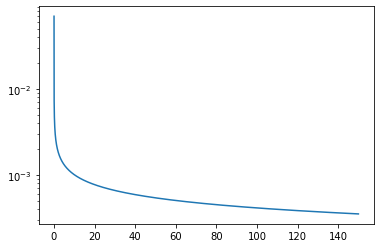

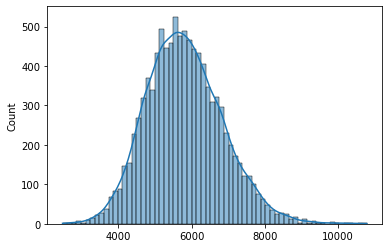

We are 95% confident that Milk customer expidenture will fall bewteen (5699.39, 5893.14), while the mean is 5796.27


In [90]:
#Calculating Parameters
milk_mean = np.mean(df['Milk'])
milk_st =np.std(df['Milk'])
milk_n = df.shape[0]

# Calculating the shape and scale parameters for milk

variance_gamma = milk_st**2  # Variance is the square of the standard deviation

# Shape parameter (k)
k_gamma = milk_mean**2 / variance_gamma

# Scale parameter (theta)
theta_gamma = variance_gamma / milk_mean

# Number of samples per mean calculation and number of means to generate

x = np.linspace (0, 150, 1000000) # This is creating the x-scale starting from 0 to 150 and simulating 10,000 samples
y = stats.gamma.pdf(x, a= k_gamma, scale=theta_gamma)#
plt.yscale('log')
plt.plot(x,y)
plt.show();

num_samples_per_mean = 50
num_means = 10000

# Generate random samples and calculate means
means = [np.random.gamma(k_gamma, theta_gamma, num_samples_per_mean).mean() for _ in range(num_means)]


#Calculating the standard error from the sample

sample_milk_sd = np.std(means)
milk_se = sample_milk_sd / np.sqrt(milk_n)

#Plotting The distribution
sns.histplot(means,kde=True)
plt.show();


lower = milk_mean - 1.96*milk_se
upper = milk_mean + 1.96*milk_se
lower , upper

print(f'We are 95% confident that Milk customer expidenture will fall bewteen {round(lower,2),round(upper,2)}, while the mean is {round(milk_mean,2)}')

### We will analyze 'Frozen' Foods

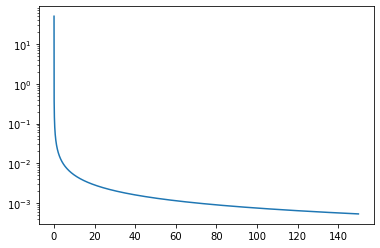

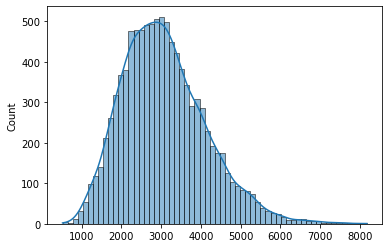

We are 95% confident that frozen customer expidenture will fall bewteen (2973.85, 3170.02), while the mean is 3071.93


In [91]:
#Calculating Parameters
frozen_mean = np.mean(df['Frozen'])
frozen_st =np.std(df['Frozen'])
frozen_n = df.shape[0]



# Calculating the shape and scale parameters for frozen

variance_gamma = milk_st**2  # Variance is the square of the standard deviation

# Shape parameter (k)
k_gamma = frozen_mean**2 / variance_gamma

# Scale parameter (theta)
theta_gamma = variance_gamma / frozen_mean

x = np.linspace (0, 150, 1000000) # This is creating the x-scale starting from 0 to 150 and simulating 10,000 samples
y = stats.gamma.pdf(x, a= k_gamma, scale=theta_gamma)#
plt.yscale('log')
plt.plot(x,y)
plt.show();


# Number of samples per mean calculation and number of means to generate
num_samples_per_mean = 50
num_means = 10000

# Generate random samples and calculate means
means = [np.random.gamma(k_gamma, theta_gamma, num_samples_per_mean).mean() for _ in range(num_means)]


#Calculating the standard error from the sample

sample_frozen_sd = np.std(means)
frozen_se = sample_frozen_sd / np.sqrt(frozen_n)

#Plotting The distribution
sns.histplot(means,kde=True)
plt.show();


lower = frozen_mean - 1.96*frozen_se
upper = frozen_mean + 1.96*frozen_se
lower , upper
print(f'We are 95% confident that frozen customer expidenture will fall bewteen {round(lower,2),round(upper,2)}, while the mean is {round(frozen_mean,2)}')

### Detergent and Paper

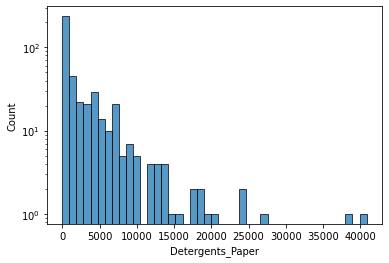

In [92]:
sns.histplot(df['Detergents_Paper'])
plt.yscale('log')

### Testing for Independence

$H_0 :$  There is no association between Channel sales and Regions

In [93]:
rowlabel = ['Channel 1','Channel 2']
collabel = ['Region 1','Region 2', 'Region 3']
table = pd.crosstab(df['Channel'], df['Region'], margins = False, normalize= True)
table.index=rowlabel
table.columns=collabel
table

,Region 1,Region 2,Region 3
Channel 1,0.134091,0.063636,0.479545
Channel 2,0.040909,0.043182,0.238636


In [94]:
rowlabel = ['Channel 1','Channel 2']
collabel = ['Region 1','Region 2', 'Region 3']
prop = pd.crosstab(df['Channel'], df['Region'], margins = False, normalize= True)
prop.index=rowlabel
prop.columns=collabel
prop

,Region 1,Region 2,Region 3
Channel 1,0.134091,0.063636,0.479545
Channel 2,0.040909,0.043182,0.238636


In [95]:
table = sm.stats.Table(table)
print(table.fittedvalues)
X2 = table.test_nominal_association()
print(X2)

           Region 1  Region 2  Region 3
Channel 1  0.118523  0.072345  0.486405
Channel 2  0.056477  0.034473  0.231777
df          2
pvalue      0.9950699856167893
statistic   0.009884413987581248


In [96]:
table.standardized_resids    

,Region 1,Region 2,Region 3
Channel 1,0.087638,-0.060306,-0.032613
Channel 2,-0.087638,0.060306,0.032613


Based on the results for the Chi-squared test, there is no dependence between the channels and the regions. 


p-Val = .099


Chi-squared Statistic: .009


***Sales Startegy:***
- We can execute a sales strategy that is uniform across channel or region. This means that we can design a marketing campaign that is the same across all channels and regions.